<a href="https://www.kaggle.com/code/mohamedelkholy972002/real-estate-price-prediction-project-v2?scriptVersionId=155435951" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
nullv = data['total_bedrooms'].isnull()
print(nullv)
data[nullv]

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: total_bedrooms, Length: 20640, dtype: bool


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [5]:
data.dropna(inplace = True)

In [6]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
data.shape

(20433, 10)

<Axes: >

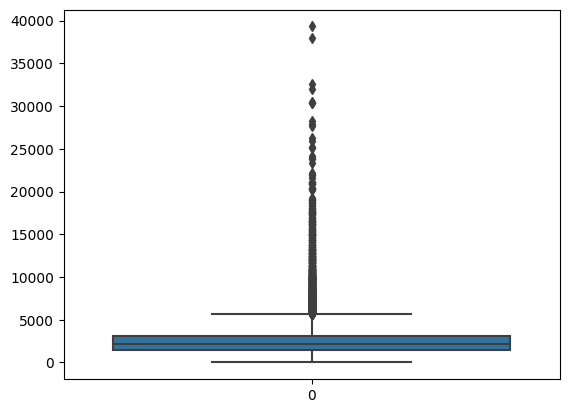

In [8]:
sns.boxplot(data['total_rooms'])

Lower Bound : -1734.0349006071751
Upper Bound : 7007.043367303206


<Axes: >

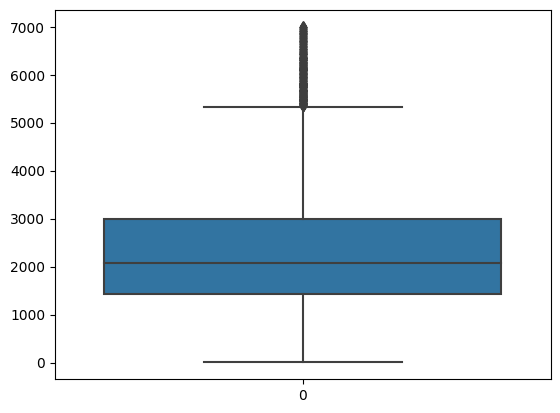

In [9]:
# calculate summary statistics
mean = data['total_rooms'].mean()
std = data['total_rooms'].std()
# Calculate the lower and upper bounds
lower = mean - std*2
upper = mean + std*2
print('Lower Bound :',lower)
print('Upper Bound :',upper)

# Drop the outliers
data = data[(data['total_rooms'] >= lower)
& (data['total_rooms'] <= upper)]
sns.boxplot(data['total_rooms'])


<Axes: >

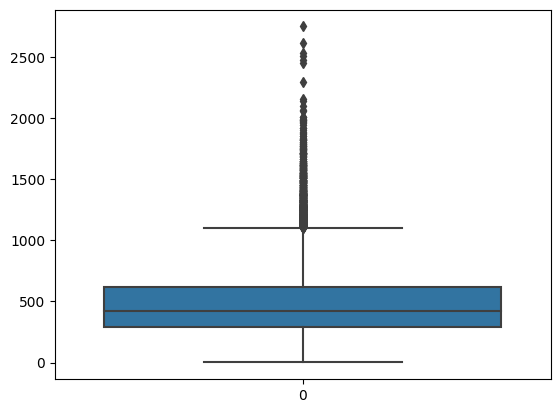

In [10]:
sns.boxplot(data['total_bedrooms'])

Lower Bound : -86.72777479188574
Upper Bound : 1056.8843309622498


<Axes: >

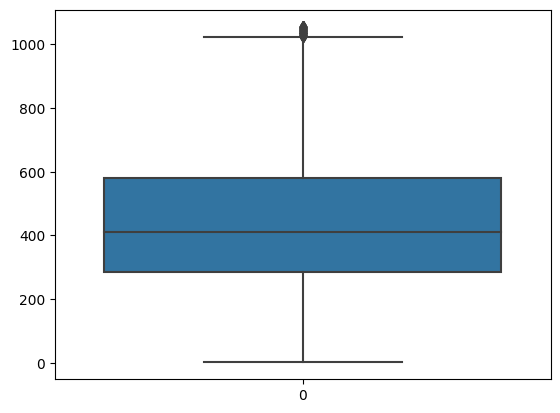

In [11]:
# calculate summary statistics
mean = data['total_bedrooms'].mean()
std = data['total_bedrooms'].std()
# Calculate the lower and upper bounds
lower1 = mean - std*2
upper1 = mean + std*2
print('Lower Bound :',lower1)
print('Upper Bound :',upper1)

# Drop the outliers
data = data[(data['total_bedrooms'] >= lower1)
& (data['total_bedrooms'] <= upper1)]
sns.boxplot(data['total_bedrooms'])

<Axes: >

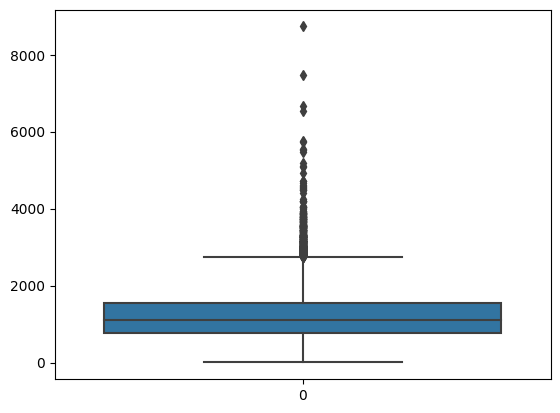

In [12]:
sns.boxplot(data['population'])

Lower Bound : -107.7096979161729
Upper Bound : 2529.6964881579966


<Axes: >

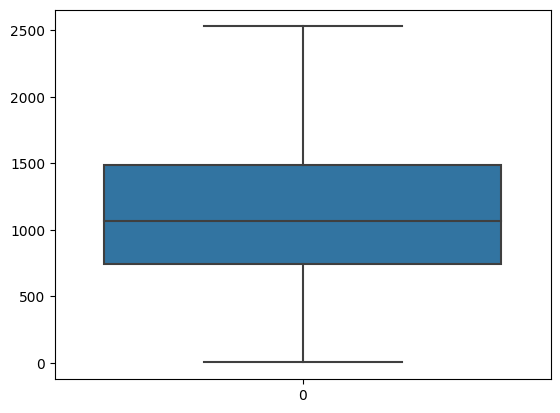

In [13]:
# calculate summary statistics
mean = data['population'].mean()
std = data['population'].std()
# Calculate the lower and upper bounds
lower2 = mean - std*2
upper2 = mean + std*2
print('Lower Bound :',lower2)
print('Upper Bound :',upper2)

# Drop the outliers
data = data[(data['population'] >= lower2)
& (data['population'] <= upper2)]
sns.boxplot(data['population'])

<Axes: >

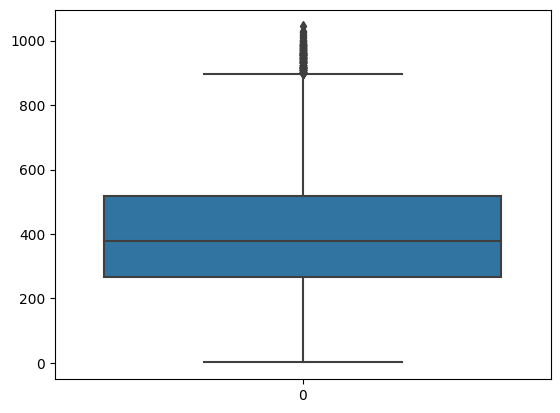

In [14]:
sns.boxplot(data['households'])

In [15]:
data.shape

(17969, 10)

Lower Bound : 18.063078769311232
Upper Bound : 782.2818486056123


<Axes: >

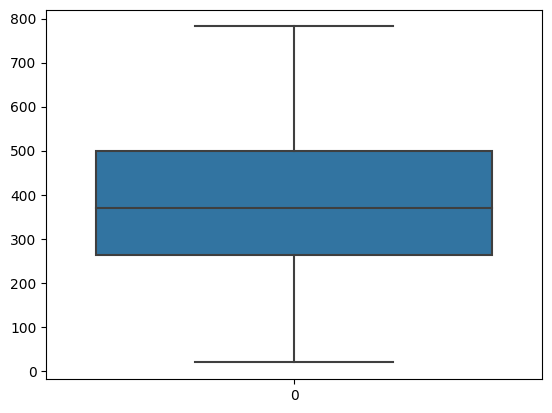

In [16]:
# calculate summary statistics
mean = data['households'].mean()
std = data['households'].std()
# Calculate the lower and upper bounds
lower3 = mean - std*2
upper3 = mean + std*2
print('Lower Bound :',lower3)
print('Upper Bound :',upper3)

# Drop the outliers
data = data[(data['households'] >= lower3)
& (data['households'] <= upper3)]
sns.boxplot(data['households'])

<Axes: >

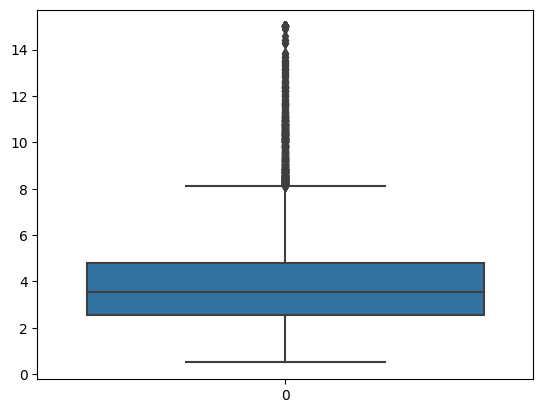

In [17]:
# median_income         0
# median_house_value    0
# ocean_proximity
sns.boxplot(data['median_income'])

In [18]:
mean = data['median_income'].mean()
std = data['median_income'].std()
# Calculate the lower and upper bounds
lower3 = mean - std*2
upper3 = mean + std*2
print('Lower Bound :',lower3)
print('Upper Bound :',upper3)

# Drop the outliers
data = data[(data['median_income'] >= lower3)
& (data['median_income'] <= upper3)]


Lower Bound : 0.022469606194215785
Upper Bound : 7.734572710687084


In [19]:
data.shape

(16453, 10)

<Axes: >

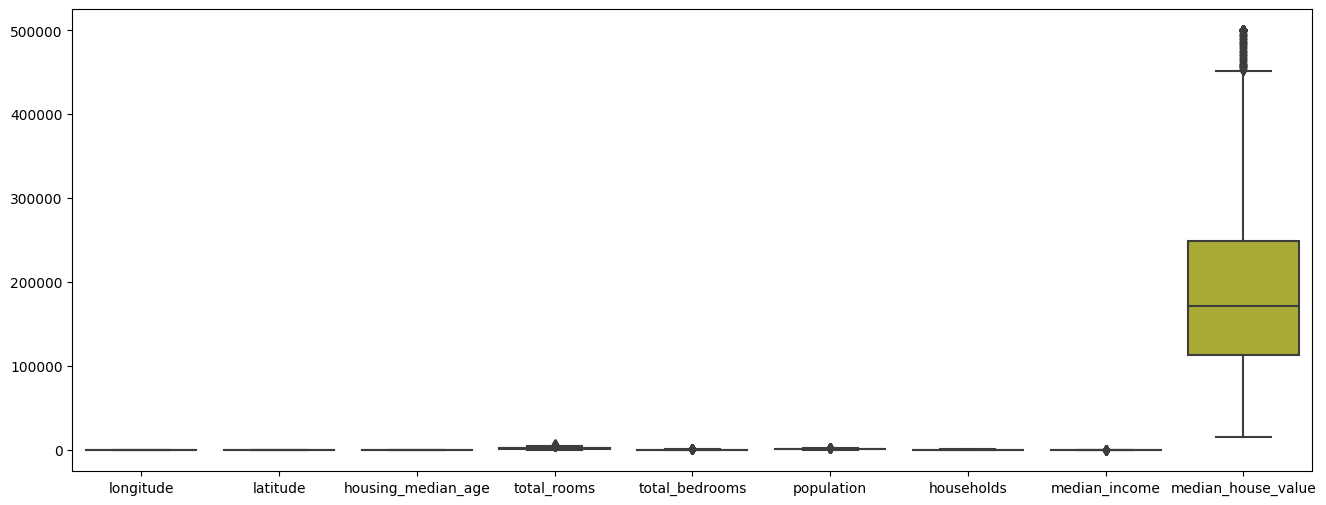

In [20]:
plt.figure(figsize=(16, 6))
sns.boxplot(data)

In [21]:
data.shape

(16453, 10)

In [1]:
print('hello kareem')

hello kareem
